# Lab: Pokémon Data Classification

## Objective
This notebook demonstrates how to classify Pokémon as legendary or not using two machine learning models:
- Logistic Regression
- Multi-Layer Perceptron (MLP)

We will compare the performance of both models using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.

## Step 1: Load and Explore the Dataset

In [4]:
# Your import 
import pandas as pd 

# Load the Pokémon dataset
pokemon_data =  pd.read_csv("pokemon.csv") 

# Display the first few rows
pokemon_data.head(5)

,name,deck_no,attack,defense,sp_attack,sp_defense,speed,capture_rt,total_bs,type,gen,legendary
0,Bulbasaur,1,49,49,65,65,45,45,318,grass,1,0
1,Ivysaur,2,62,63,80,80,60,45,405,grass,1,0
2,Venusaur,3,100,123,122,120,80,45,625,grass,1,0
3,Charmander,4,52,43,60,50,65,45,309,fire,1,0
4,Charmeleon,5,64,58,80,65,80,45,405,fire,1,0


## Step 2: Data Preprocessing
### 2.1 Feature Engineering

### <span style="color:red">Please create a derived feature: sp_attack_to_sp_defense_ratio, Target is Legendary</span>. 

In [16]:
# Create a derived feature: sp_attack_to_sp_defense_ratio
pokemon_data["sp_attack_to_sp_defense_ratio"] = pokemon_data["sp_attack"] / pokemon_data["sp_defense"]

# Select all features + derived  
# target: Legendary 
features = ["attack", "defense", "sp_attack", "sp_defense", "speed", "capture_rt", "total_bs", "sp_attack_to_sp_defense_ratio"]
target = "legendary"

X = pokemon_data[features] # Your code
y = pokemon_data[target] # Your code

### 2.2 Data Transformation Using ColumnTransformer

In [20]:
# Your import 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler, OneHotEncoder 

# Categorical and numerical columns
numerical_features = ["attack", "defense", "sp_attack", "sp_defense", "speed", "capture_rt", "total_bs", "sp_attack_to_sp_defense_ratio"]

# Preprocessing pipeline
# please choose one suitable method as your scaling method
# please use OneHot as your Encoder
# Your code

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features) #scale numerical features
    ]
)

preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['attack', 'defense', 'sp_attack',
                                  'sp_defense', 'speed', 'capture_rt',
                                  'total_bs',
                                  'sp_attack_to_sp_defense_ratio'])])

### Prepare the training data

In [30]:
from sklearn.model_selection import train_test_split

# Transform the data
X_transformed = preprocessor.fit_transform(X)

# Train-test split
# Step 1: First train-test split to create training and temporary sets
# X_transformed: Preprocessed feature data
# y: Target labels
# test_size=0.3: Reserve 30% of the data for validation and test sets
# random_state=42: Ensures reproducibility of the splits
# stratify=y: Maintains the class distribution in the split

X_train, X_temp, y_train, y_temp = train_test_split(
    X_transformed, y, test_size=0.3, random_state=42, stratify=y
)

#check the shapes 
X_train.shape, X_temp.shape, y_train.shape, y_temp.shape



((560, 8), (241, 8), (560,), (241,))

In [32]:
# Your import 

# Please use train_test_split to prepare your data
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
    
)

#Print your X_train and X_test
X_train[:2], X_test[:2]

(array([[-0.40006789, -0.26044725, -0.968214  , -1.10700876, -1.77001294,
          1.19130465, -0.9517153 , -0.13843446],
        [ 0.19111895, -0.09784534, -0.19502508, -0.03220389, -0.52510226,
         -0.70940526, -0.1542614 , -0.30764966]]),
 array([[ 0.53338501,  0.38996038,  1.19671498,  0.86346683,  0.44316161,
         -0.70940526,  0.89502004,  0.23562019],
        [-0.40006789, -0.42304916,  1.19671498,  0.86346683,  2.20678508,
         -0.70940526,  0.81107752,  0.23562019]]))

## Step 3: Logistic Regression

In [44]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score

# Please build your Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)



# Train Logistic Regression
logistic_model.fit(X_train, y_train)





# Please use AUC and accuracy score to evaluate your model
# By trying different methods, your accuracy can reach over 90%.
y_val_pred_logistic = logistic_model.predict(X_val)
y_val_pred_prob_logistic = logistic_model.predict_proba(X_val)[:, 1] #probabilities for AUC

# Calculate performance metrics 
auc_val_logistic = roc_auc_score(y_val, y_val_pred_prob_logistic)
accuracy_score_logistic = accuracy_score(y_val, y_val_pred_logistic)





print("Rocio + Logistic Regression - Validation Performance:")
print(classification_report(y_val, y_val_pred_logistic))
print(f"Validation AUC: {auc_val_logistic:.4f}")
print(f"Validation accuracy: {accuracy_score_logistic:.4f}")

Rocio + Logistic Regression - Validation Performance:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       110
           1       0.82      0.90      0.86        10

    accuracy                           0.97       120
   macro avg       0.90      0.94      0.92       120
weighted avg       0.98      0.97      0.98       120

Validation AUC: 0.9982
Validation accuracy: 0.9750


## Step 4: Multi-Layer Perceptron (MLP)

In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score 

# Please build your Multi-Layer Perceptron model
# Hidden layer: 8 weights and 4 biases, activation: relu, iteration : 500
mlp_model = MLPClassifier(hidden_layer_sizes=(8, 4), activation="relu", max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Please use AUC and accuracy score to evalue your model
# By trying different methods, your accuracy can reach over 90%.
# Train MLP Classifier
y_val_pred_mlp = mlp_model.predict(X_val)
y_val_pred_prob_mlp = mlp_model.predict_proba(X_val)[:, 1]


# Evaluate MLP Classifier
auc_val_mlp = roc_auc_score(y_val, y_val_pred_prob_mlp)
accuracy_score_mlp = accuracy_score(y_val, y_val_pred_mlp)


print("Rocio + MLP Classifier - Validation Performance:")
print(classification_report(y_val, y_val_pred_mlp))
print(f"Validation AUC: {auc_val_mlp:.4f}")
print(f"Validation accuracy: {accuracy_score_mlp:.4f}")

Rocio + MLP Classifier - Validation Performance:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       110
           1       1.00      0.90      0.95        10

    accuracy                           0.99       120
   macro avg       1.00      0.95      0.97       120
weighted avg       0.99      0.99      0.99       120

Validation AUC: 0.9991
Validation accuracy: 0.9917


C:\Users\rocar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## Step 5: Comparison of Models - Training Loss Curve

### Manually record the loss of logistic regression

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression 

# Please record your loss of logistic regression with 500 iterations
# Your code


# Initialize the model with warm_start to fit incrementally
logistic_model = LogisticRegression(max_iter=1, warm_start=True, solver="lbfgs", random_state=42)

# To store the loss values
loss_curve = []

# Train the model incrementally
# Your code
for i in range(500):
    logistic_model.fit(X_train, y_train) # train the model for 1 iteration
    y_train_pred_prob = logistic_model.predict_proba(X_train)[:, 1] #get probabilities
    loss = log_loss(y_train, y_train_pred_prob) #calculate log loss 
    loss_curve.append(loss) #store the loss value 
    



C:\Users\rocar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rocar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

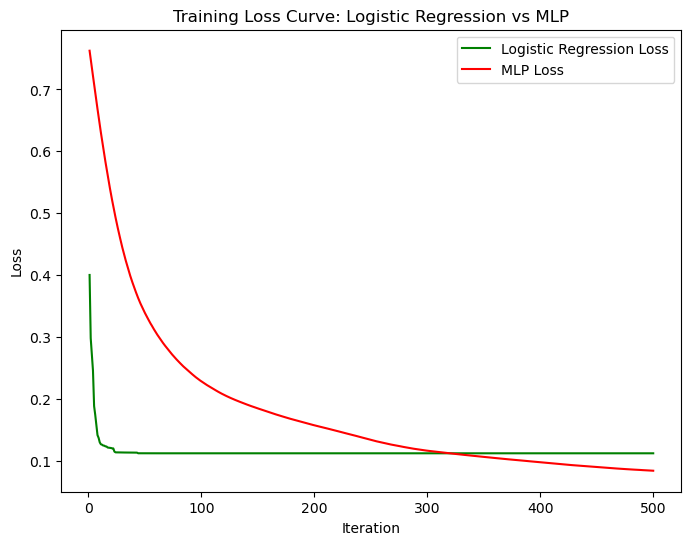

In [62]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve, roc_auc_score 

# Extract loss during MLP training
mlp_loss_curve = mlp_model.loss_curve_ #MLPClassifier stores the loss curve automatically 

# Plot the loss difference during MLP training and Logistic
# please set color of Logistic as green, set MLP as red.
plt.figure(figsize=(8,6))
plt.plot(range(1, 501), loss_curve, label="Logistic Regression Loss", color="green") #logistic 
plt.plot(range(1, len(mlp_loss_curve) + 1), mlp_loss_curve, label="MLP Loss", color="red") #MLP
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss Curve: Logistic Regression vs MLP")
plt.legend()
plt.show()



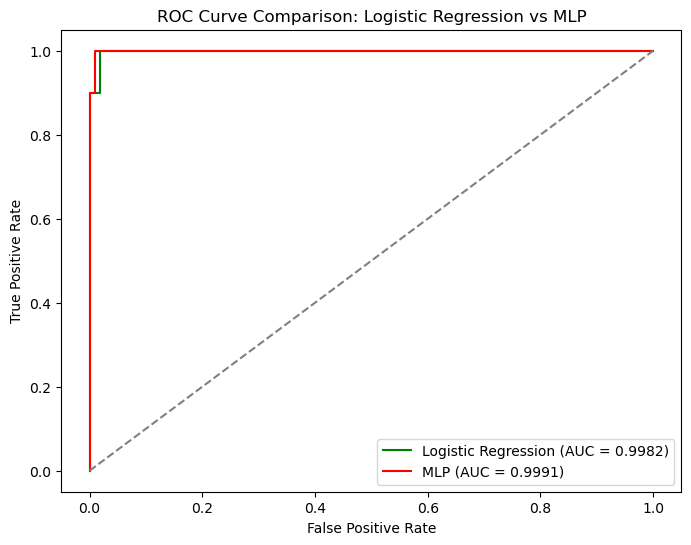

In [78]:
#import matplotlib.pyplot as plt
#from sklearn.metrics import roc_curve

# get predicted probabilities for ROC curve 
y_val_pred_prob_logistic = logistic_model.predict_proba(X_val)[:, 1] #logistic
y_val_pred_prob_mlp = mlp_model.predict_proba(X_val)[:, 1] #MLP

#compute ROC curves 
fpr_logistic, tpr_logistic, _ = roc_curve(y_val, y_val_pred_prob_logistic)
fpr_mlp, tpr_mlp, _ = roc_curve(y_val, y_val_pred_prob_mlp)

#compute AUC scores
auc_logistic = roc_auc_score(y_val, y_val_pred_prob_logistic)
auc_mlp = roc_auc_score(y_val, y_val_pred_prob_mlp)

#plot roc curve
plt.figure(figsize=(8,6))
plt.plot(fpr_logistic, tpr_logistic, label=f"Logistic Regression (AUC = {auc_logistic:.4f})", color="green")
plt.plot(fpr_mlp, tpr_mlp, label=f"MLP (AUC = {auc_mlp:.4f})", color="red")
plt.plot([0,1], [0,1], linestyle="--", color="gray") #random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison: Logistic Regression vs MLP")
plt.legend()
plt.show()

 

In [68]:
# Your idea:
#An idea that can help the MLP perform better could be to increase 
#the number of hidden neurons or the number of hidden layers.
#More neurons capture complex patterns though it would increase time 
# Increasing the number of hidden layers can improve feature learning but may
#cause overfitting 

## Step 6: Visualization of Predictions and Confusion Matrices

### 6.1 Actual vs Predicted Results

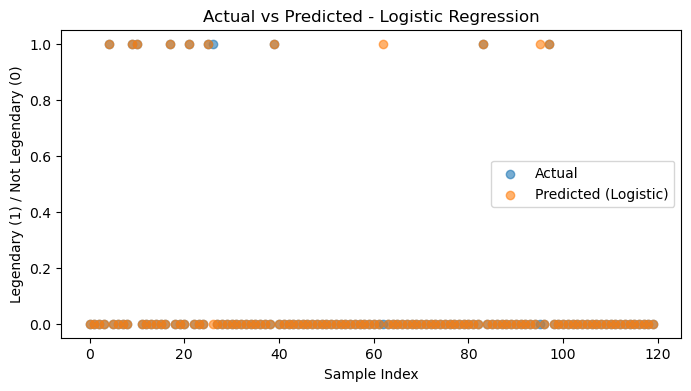

In [82]:
# Please plot the Actual data and Predicted for Logistic and MLP model
# Your code
#import malplotlib.pyplot as plt 

plt.figure(figsize=(8,4))
plt.scatter(range(len(y_val)), y_val, label="Actual", alpha=0.6)
plt.scatter(range(len(y_val_pred_logistic)), y_val_pred_logistic, label="Predicted (Logistic)", alpha=0.6)
plt.xlabel("Sample Index")
plt.ylabel("Legendary (1) / Not Legendary (0)")
plt.title("Actual vs Predicted - Logistic Regression")
plt.legend()
plt.show()

### Confusion Matrices

In [ ]:
# plot Logistic Regression
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Logistic Regression
plot_confusion_magtrix(y_val, y_val_pred_logistic, "Logistic Regression")


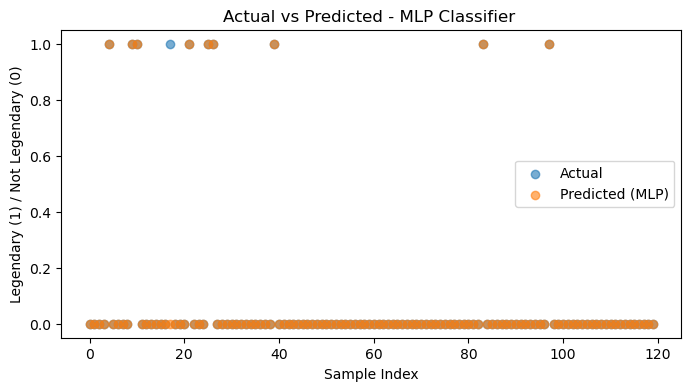

In [86]:
# plot MLP
plt.figure(figsize=(8,4))
plt.scatter(range(len(y_val)), y_val, label="Actual", alpha=0.6)
plt.scatter(range(len(y_val_pred_mlp)), y_val_pred_mlp, label="Predicted (MLP)", alpha=0.6)
plt.xlabel("Sample Index")
plt.ylabel("Legendary (1) / Not Legendary (0)")
plt.title("Actual vs Predicted - MLP Classifier ")
plt.legend()
plt.show()


## Conclusion

In [ ]:
# Please compare the difference and common between Logistic results and MLP results
# Your idea :
# I noticed that both models correctly classified the majority of the samples. 
# I can also see that both models missclassified some samples in the upper region
# legendary category. A difference can be that the MLP potentially performed 
# slightly better since there are less visible blue dots. A general difference between 
# logistic regression and mlp is that if an MLP was trained with too many hidden layers
# or too many neurons the model might fit the data really well but be generalizing poorly
# Logistic regression on the other hand is simpler and more interpretable, though it
# is not suitable for complex patters like MLP 